In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd
from sklearn import mixture

In [12]:
df = pd.read_csv('C:\\Users\yambo\Downloads\earthquakes.csv')
df.columns

Index(['index', 'Date', 'Time', 'Latitude', 'Longitude', 'Magnitude(ML)',
       'Remarks', 'Epicenter', 'Form'],
      dtype='object')

In [13]:
df = df.drop(['Form','Remarks','index'],axis = 1)
df.columns = ['Date','Time','Lat',"Long","Magnitude","Epicenter"]

In [14]:
dates = []
for line in df.Date:
    date = line.split()
    date = line.split(":")
    del date[:2]
    dates.append(date)
Times = []
for line in df.Time:
    Time = line.split("Local:")  
    del Time[0]
    for time_line in Time:
        Time = time_line.split('UTC:')
        del Time[1]
    Times.append(Time)
Times = pd.DataFrame(Times)
Times.columns =['Time']
Dates = pd.DataFrame(dates)
Dates.columns=['Date']
Dates['DateTime'] = Dates["Date"]+ " " + Times["Time"].map(str)
Dates['DateTime'] = pd.to_datetime(Dates['DateTime'],  errors='coerce')
df['DateTime'] = Dates['DateTime']
df = df.drop(['Date','Time'],axis = 1)

In [15]:
df

,Lat,Long,Magnitude,Epicenter,DateTime
0,28.70,82.88,4.6,Rukum,1994-12-13 11:00:00
1,29.84,80.69,4.6,Darchula,1994-12-12 11:00:00
2,29.72,81.56,4.5,Bajura,1994-11-27 11:00:00
3,29.54,81.15,4.2,Bajhang,1994-11-21 11:00:00
4,28.92,82.00,4.7,Jajarkot,1994-10-24 11:00:00
...,...,...,...,...,...
1030,27.78,88.15,4.5,Taplejung,2021-02-04 03:58:00
1031,28.78,84.10,5.3,Manang,2021-02-02 21:59:00
1032,27.66,86.18,4.0,Dolakha,2021-01-14 17:25:00
1033,29.89,80.70,4.2,Darchula,2021-01-12 09:48:00


In [16]:
df = df.sort_values(by='DateTime')
df = df.reset_index()

df = df.dropna()

(array([25], dtype=int64), array([4], dtype=int64))


In [20]:
check = ['India',"Bangladesh","Bhuj/India","Bhutan","Chamauli/India","Tibet","Bangaladesh","Pithoragarh","Sikkim"
        ,"India (close to Darchula)", "Jhapa-India Border Region"]

for place in check:
    for epicenter in df.Epicenter:
        df = df[df.Epicenter != place]

In [23]:
df = df.drop(['index'],axis = 1)
df.describe()

,Lat,Long,Magnitude
count,1002.000000,1002.000000,1002.000000
mean,28.151224,84.864626,4.436926
std,0.749411,2.660619,0.456689
min,26.630000,28.980000,3.600000
25%,27.710000,84.092500,4.100000
50%,27.900000,85.530000,4.300000
75%,28.290000,86.127500,4.600000
max,30.370000,89.970000,7.600000


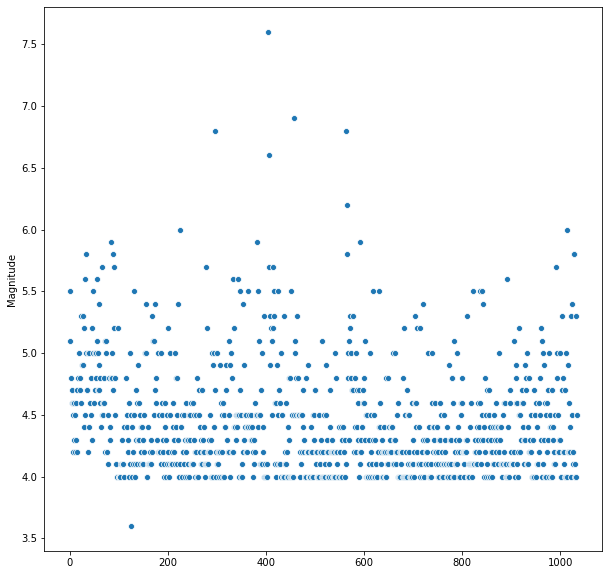

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(y="Magnitude", x=df.Magnitude.index , data=df)

In [25]:
df_magnitude_count = pd.DataFrame(df.Magnitude.groupby(df.Magnitude).count())
df_magnitude_count['index'] = df_magnitude_count.index
df_magnitude_count.columns = ["Count","Magnitude"]

[Text(0, 0, '3.6'),
 Text(0, 0, '4.0'),
 Text(0, 0, '4.1'),
 Text(0, 0, '4.2'),
 Text(0, 0, '4.3'),
 Text(0, 0, '4.4'),
 Text(0, 0, '4.5'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.8'),
 Text(0, 0, '4.9'),
 Text(0, 0, '5.0'),
 Text(0, 0, '5.1'),
 Text(0, 0, '5.2'),
 Text(0, 0, '5.3'),
 Text(0, 0, '5.4'),
 Text(0, 0, '5.5'),
 Text(0, 0, '5.6'),
 Text(0, 0, '5.7'),
 Text(0, 0, '5.8'),
 Text(0, 0, '5.9'),
 Text(0, 0, '6.0'),
 Text(0, 0, '6.2'),
 Text(0, 0, '6.6'),
 Text(0, 0, '6.8'),
 Text(0, 0, '6.9'),
 Text(0, 0, '7.6')]

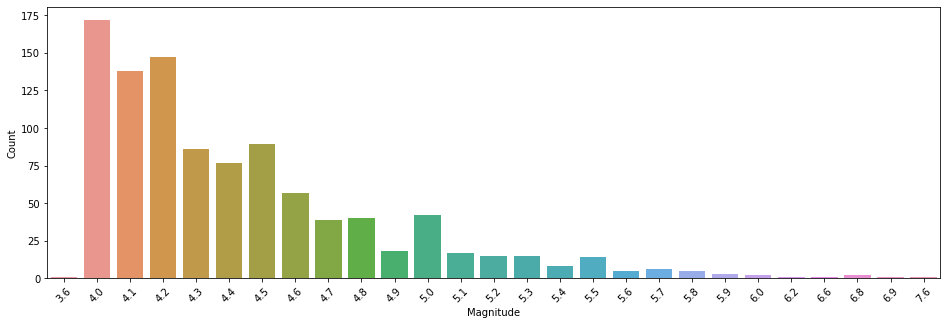

In [26]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x="Magnitude", y="Count", data=df_magnitude_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [27]:
scale = []
for magnitude in df.Magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        scale.append("Limited Damage")
    elif magnitude >=4.0 and magnitude <=4.9:
        scale.append("Minor Damage")
    elif magnitude >=5.0 and magnitude <=5.9:
        scale.append("Slight Damage")
    elif magnitude >=6.0 and magnitude <=6.9:
        scale.append("Severe Damage")
    elif magnitude >=7.0 and magnitude <=7.9:
        scale.append("Serious Damage")
    else:
        scale.append("Great Damage")

In [30]:
df['scale'] = scale

In [31]:
df_damage_count = pd.DataFrame(df.scale.groupby(df.scale).count().sort_values(ascending=False))
df_damage_count['percent'] = ((df_damage_count.scale)/sum(df_damage_count.scale))*100

Text(0.5, 0, 'Magnitude class')

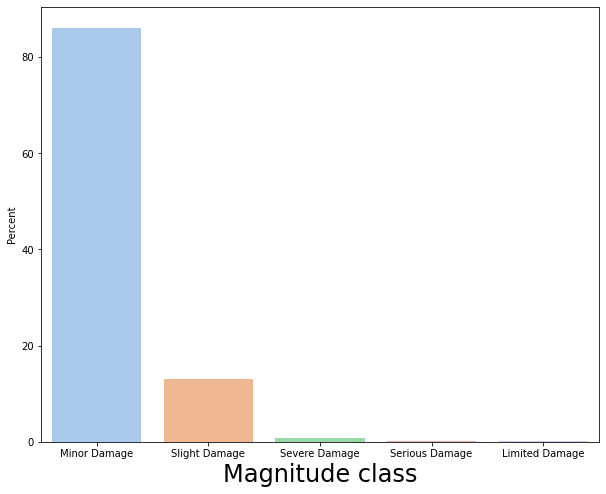

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(df_damage_count.index,df_damage_count.percent, palette="pastel")
plt.ylabel('Percent')
plt.xlabel('Magnitude class', fontsize=24)

In [33]:
group_by_year = pd.DataFrame(df.Magnitude.groupby([df['DateTime'].dt.year]).count())
group_by_year.columns = ['Frequency']

[Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020'),
 Text(0, 0, '2021')]

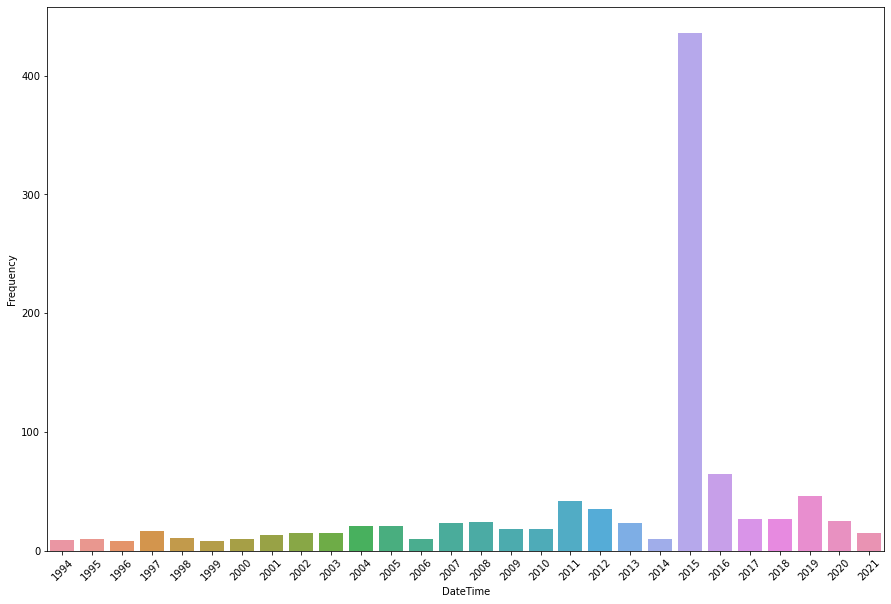

In [34]:
plt.figure(figsize=(15,10))
by_year = sns.barplot(x=group_by_year.index, y=group_by_year.Frequency)
by_year.set_xticklabels(by_year.get_xticklabels(),rotation=45)

In [36]:
df_year = df[['Lat','Long','Magnitude','DateTime']]
df = df[['Lat','Long','Magnitude']]
df = df[df.Magnitude >= 5]
df_year = df_year[df_year.Magnitude >= 5]
len(df_year),len(df)

(138, 138)

In [37]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)    
    Sum_of_squared_distances.append(km.inertia_)

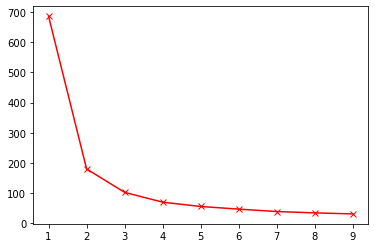

In [38]:
plt.plot(K, Sum_of_squared_distances, 'rx-')

In [39]:
kmeans = KMeans(n_clusters=2).fit(df)
df['Clusters'] = kmeans.labels_

In [40]:
map_1 = gpd.read_file(r"C:\Users\yambo\Downloads\NPL_adm3.shp")

In [41]:
centroid_1, centroid_2 = kmeans.cluster_centers_
centroid_1 = np.delete(centroid_1,2)
centroid_2 = np.delete(centroid_2,2)

(79.6086496429444, 89.5414928741455, 26.142539787292474, 30.65199680328381)

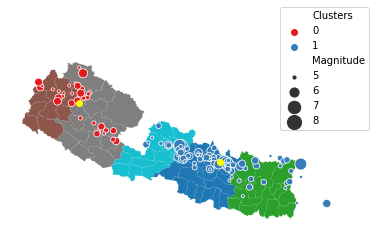

In [42]:
map_1.plot(column = 'NAME_1')
sns.scatterplot(x=df.Long, y=df.Lat, hue = df.Clusters ,palette='Set1',
                size=df.Magnitude, sizes=(10,200), 
                    legend = 'brief')
plt.legend(loc=2, bbox_to_anchor=(0.80, 1.30))

plt.scatter(centroid_1[1],centroid_1[0],color="yellow")
plt.scatter(centroid_2[1],centroid_2[0],color="yellow")
plt.axis('off')

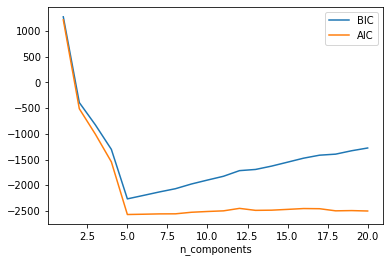

In [67]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(df)
          for n in n_components]

plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [66]:
model = mixture.GaussianMixture(n_components=5,covariance_type='full', max_iter=10000)
model.fit(df)
df['Clusters2'] = model.predict(df);

(79.6086496429444, 89.5414928741455, 26.142539787292474, 30.65199680328381)

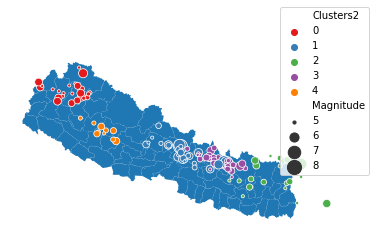

In [60]:
map_1.plot(column = 'NAME_0')
sns.scatterplot(x=df.Long, y=df.Lat, hue = df.Clusters2 ,palette='Set1',
                size=df.Magnitude, sizes=(10,200), 
                    legend = 'brief')
plt.legend(loc=2, bbox_to_anchor=(0.80, 1.30))
plt.axis('off')

In [70]:
df_1994_2014 = df_year[(df_year['DateTime'].dt.year >= 1994) 
                       & (df_year['DateTime'].dt.year < 2015) 
                       & (df_year['Magnitude']>=5)]

df_2015 = df_year[(df_year['DateTime'].dt.year == 2015) & (df_year['Magnitude']>=5)]

df_2016 = df_year[(df_year['DateTime'].dt.year > 2015) & (df_year['Magnitude']>=5)]

(79.6086496429444, 89.5414928741455, 26.142539787292474, 30.65199680328381)

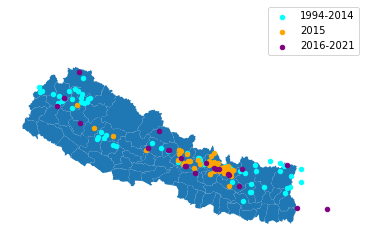

In [72]:
map_1.plot(column = 'NAME_0')
plt.scatter(df_1994_2014.Long, df_1994_2014.Lat,20,color='cyan',
            label="1994-2014")
plt.scatter(df_2015.Long, df_2015.Lat,20,label="2015",
            color='orange')
plt.scatter(df_2016.Long, df_2016.Lat,20,label = "2016-2021",
            color='purple')

plt.legend(bbox_to_anchor=(1.05, 1.30), loc=1, borderaxespad=0.)
plt.axis('off')